# DO UPVOTE AND COMMENT

# Context
**This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.**

# Content
**This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:**

1. BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

2. BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.

3. BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. 

**Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:**

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.

# ***THINGS YOU HAVE TO FOLLOW WHILE WALKING THROUGH THE WHOLE REPORT***

1. If you are familiar with python then only follow the code. 
2. The simple explanations about any visual or graph will be there.
3. There will be a brief conclusion of the report.
4. Every explanation is presented below the line of code's output.

***Enjoy***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install pywaffle --quiet
from pywaffle import Waffle
from wordcloud import WordCloud

In [2]:
df= pd.read_csv("../input/nyc-property-sales/nyc-rolling-sales.csv")

In [3]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [4]:
df.iloc[:8,:10]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET


In [5]:
df.iloc[:8,10:20]

,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
0,,10009,5,0,5,1633,6440,1900,2,C2
1,,10009,28,3,31,4616,18690,1900,2,C7
2,,10009,16,1,17,2212,7803,1900,2,C7
3,,10009,10,0,10,2272,6794,1913,2,C4
4,,10009,6,0,6,2369,4615,1900,2,C2
5,,10009,20,0,20,2581,9730,1900,2,C4
6,,10009,8,0,8,1750,4226,1920,2,C4
7,,10009,44,2,46,5163,21007,1900,2,C7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [7]:
#SALE PRICE is object but should be numeric
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

#LAND and GROSS SQUARE FEET is object but should be numeric
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

#SALE DATE is object but should be datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

#Both TAX CLASS attributes should be categorical
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

# DATA INSPECTION 

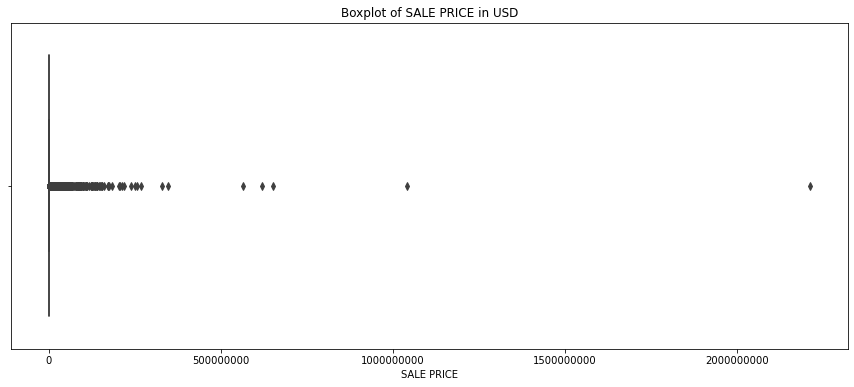

In [8]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

# THERE's ONLY ONE THING I HATE IN DATA ==> OUTLIERS

In [9]:
# Remove observations with missing SALE PRICE
df = df[df['SALE PRICE'].notnull()]
len(df)

69987

In [10]:
# Removes all NULL values
df = df[df['LAND SQUARE FEET'].notnull()] 
df = df[df['GROSS SQUARE FEET'].notnull()] 

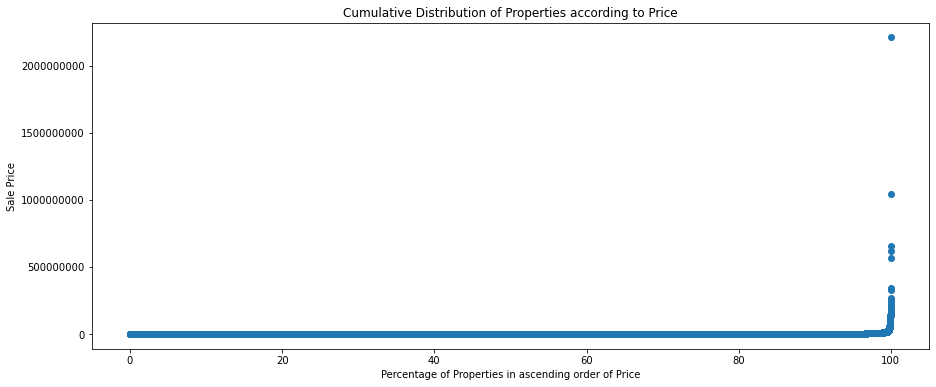

In [11]:
#Set the size of the plot
plt.figure(figsize=(15,6))

#Get the data and format it
x = df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

# Plot the data and configure the settings
plt.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'], linestyle='None', marker='o')
plt.title('Cumulative Distribution of Properties according to Price')
plt.xlabel('Percentage of Properties in ascending order of Price')
plt.ylabel('Sale Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# NO OUTLIERS == DATA BETWEEN 100,000 USD - 5,000,000 USD

In [12]:
# Remove observations that fall outside those caps
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

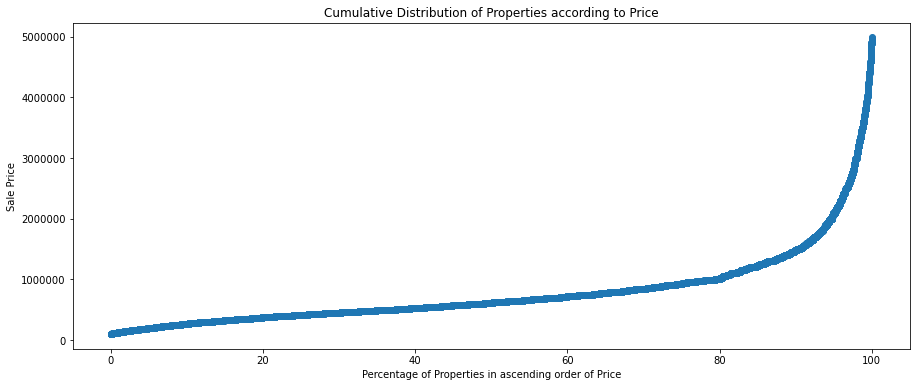

In [13]:
#Set the size of the plot
plt.figure(figsize=(15,6))

#Get the data and format it
x = df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

# Plot the data and configure the settings
plt.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'], linestyle='None', marker='o')
plt.title('Cumulative Distribution of Properties according to Price')
plt.xlabel('Percentage of Properties in ascending order of Price')
plt.ylabel('Sale Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# MISSION ACCOMPLISHED == CURVE CHANGED

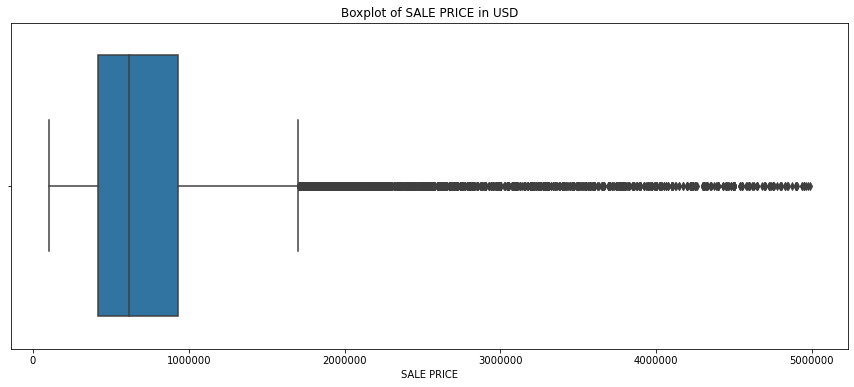

In [14]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

# MISSION ACCOMPLISHED == BOXPLOT CHANGED

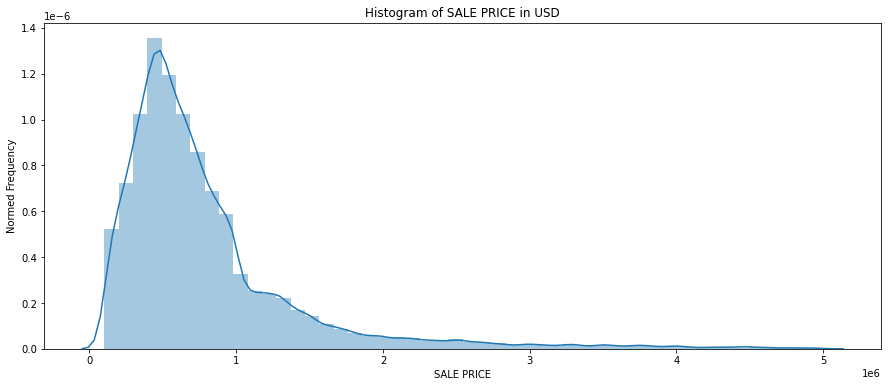

In [15]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(df['SALE PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()

# DATA SKEWNESS == UGLY

0.14698712708587405


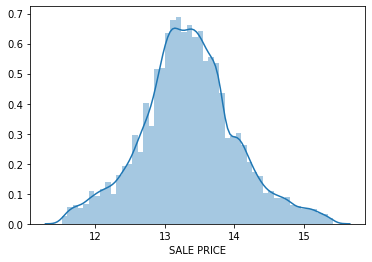

In [16]:
sales=np.log(df['SALE PRICE'])
print(sales.skew())
sns.distplot(sales)

# DATA NORMALIZED == BEAUTIFUL

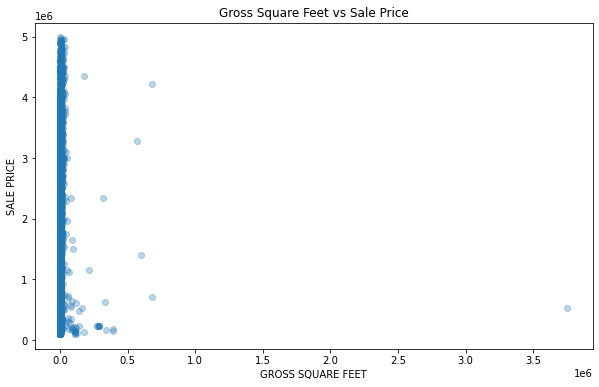

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

# UGH, OUTLIERS

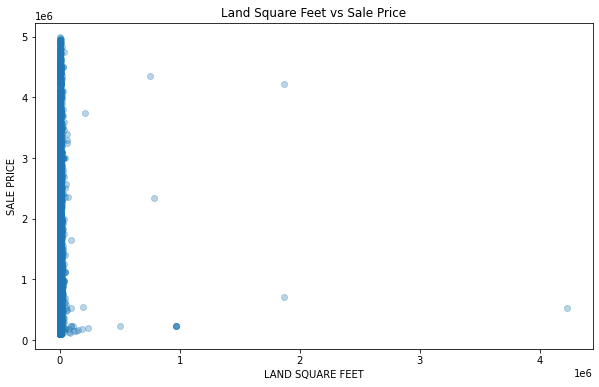

In [18]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Land Square Feet vs Sale Price')
plt.show()

In [19]:
# Keeps properties with fewer than 20,000 Square Feet, which is about 2,000 Square Metres
df = df[df['GROSS SQUARE FEET'] < 20000]
df = df[df['LAND SQUARE FEET'] < 20000]

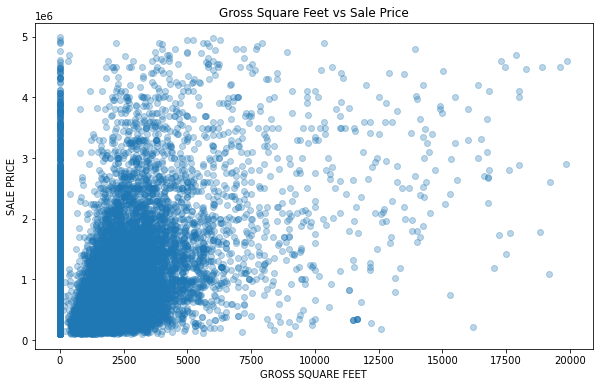

In [20]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

# PROBLEM SOLVED

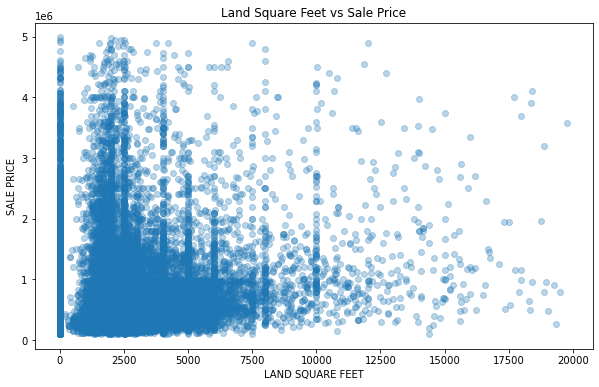

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Land Square Feet vs Sale Price')
plt.show()

In [22]:
#Dropping column as it is empty
del df['EASE-MENT']
#Dropping as it looks like an iterator
del df['Unnamed: 0']

In [23]:
#Checking for duplicated entries
sum(df.duplicated(df.columns))

54

In [24]:
#Delete the duplicates and check that it worked
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [25]:
# Only a handful of properties with 0 total units are remaining and they will now be deleted
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] < 50)]

In [26]:
#Remove data where commercial + residential doesn't equal total units
df = df[df['TOTAL UNITS'] == df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]

In [27]:
df[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 2261)] 

# DATA VISUALIZATION

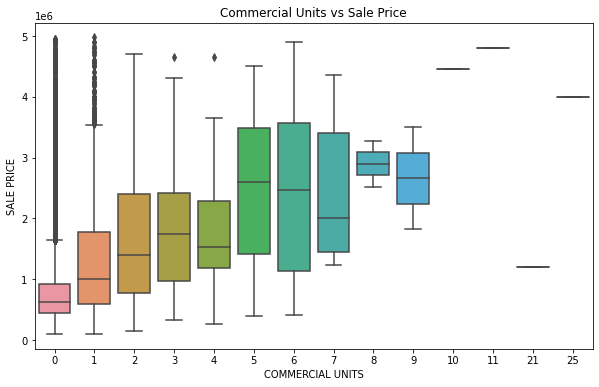

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df)
plt.title('Commercial Units vs Sale Price')
plt.show()

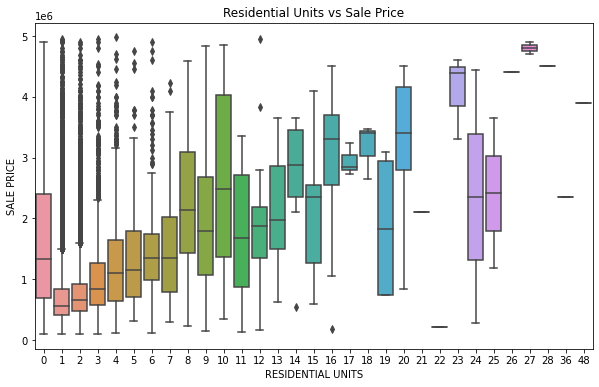

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df)
plt.title('Residential Units vs Sale Price')
plt.show()

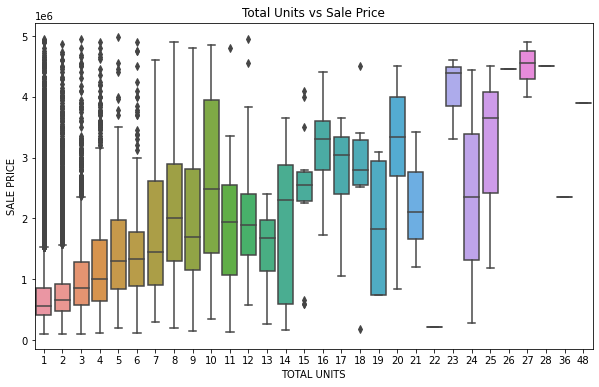

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TOTAL UNITS', y='SALE PRICE', data=df)
plt.title('Total Units vs Sale Price')
plt.show()

In [31]:
df = df[df['YEAR BUILT'] > 0]

In [32]:
df.columns[df.isnull().any()]

Index([], dtype='object')

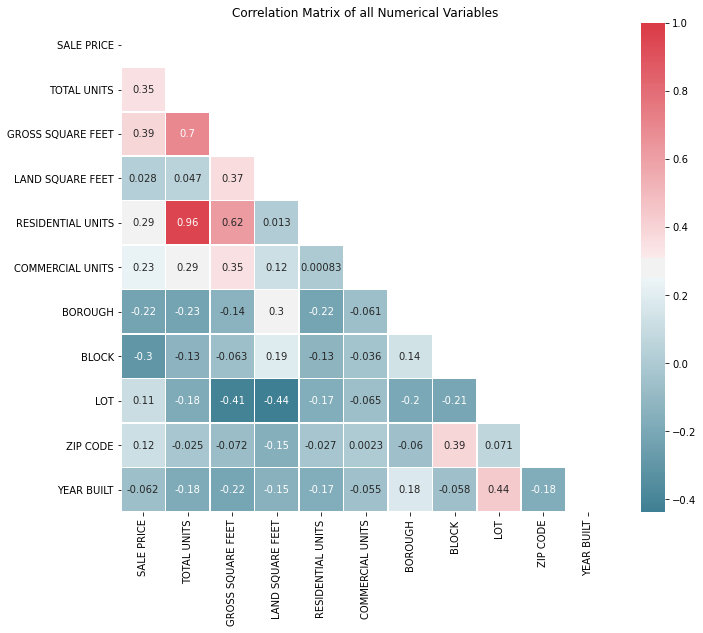

In [33]:
# Compute the correlation matrix
d= df[['SALE PRICE', 'TOTAL UNITS','GROSS SQUARE FEET',  'LAND SQUARE FEET', 'RESIDENTIAL UNITS', 
         'COMMERCIAL UNITS', 'BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'YEAR BUILT',]]
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

# CORRELATION MATRIX

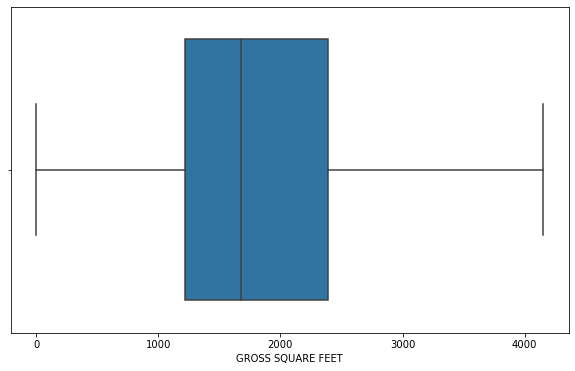

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='GROSS SQUARE FEET', data=df,showfliers=False)

# NO OUTLIERS OBSERVED IN GROSS AND LAND SQUARE FEET

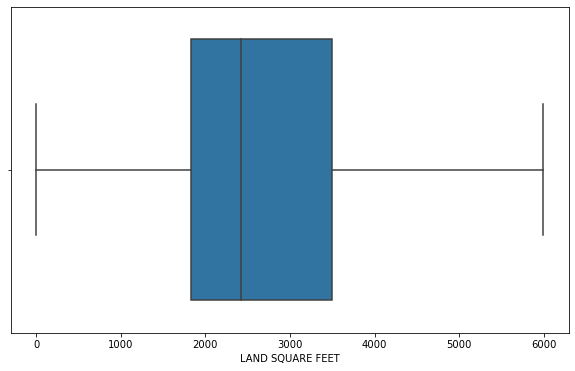

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LAND SQUARE FEET', data=df,showfliers=False)


In [36]:
pivot=df.pivot_table(index='TAX CLASS AT TIME OF SALE', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
TAX CLASS AT TIME OF SALE,
1,599000.0
2,985000.0
4,1260000.0


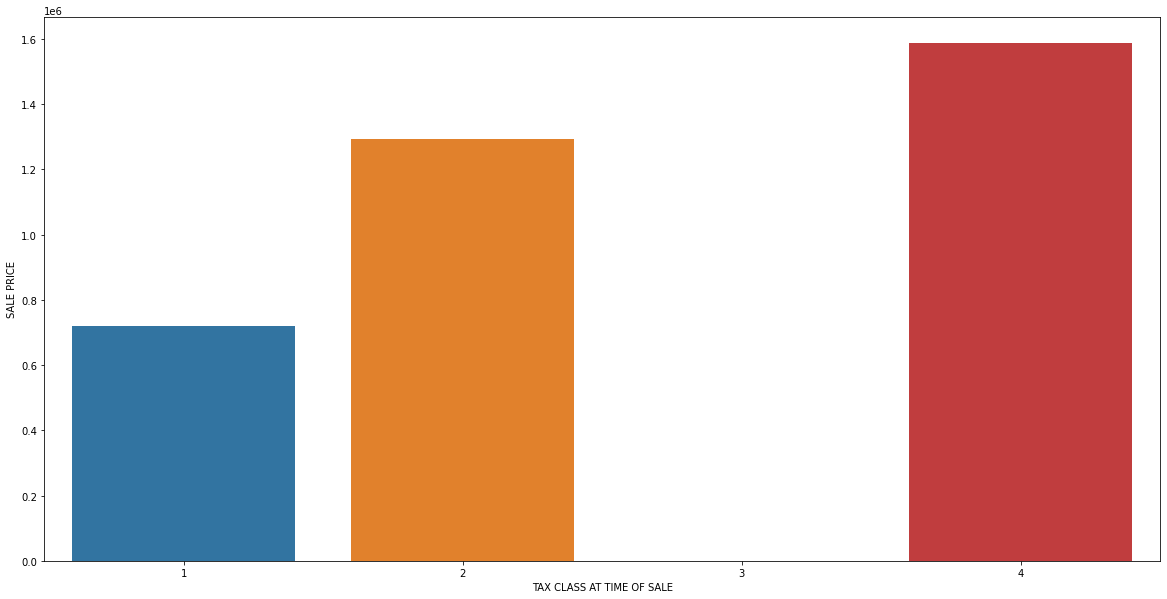

In [37]:
cat=df[["TAX CLASS AT TIME OF SALE", "SALE PRICE"]].groupby(['TAX CLASS AT TIME OF SALE'], as_index=False).mean().sort_values(by='SALE PRICE', ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='TAX CLASS AT TIME OF SALE', y='SALE PRICE', data=cat)

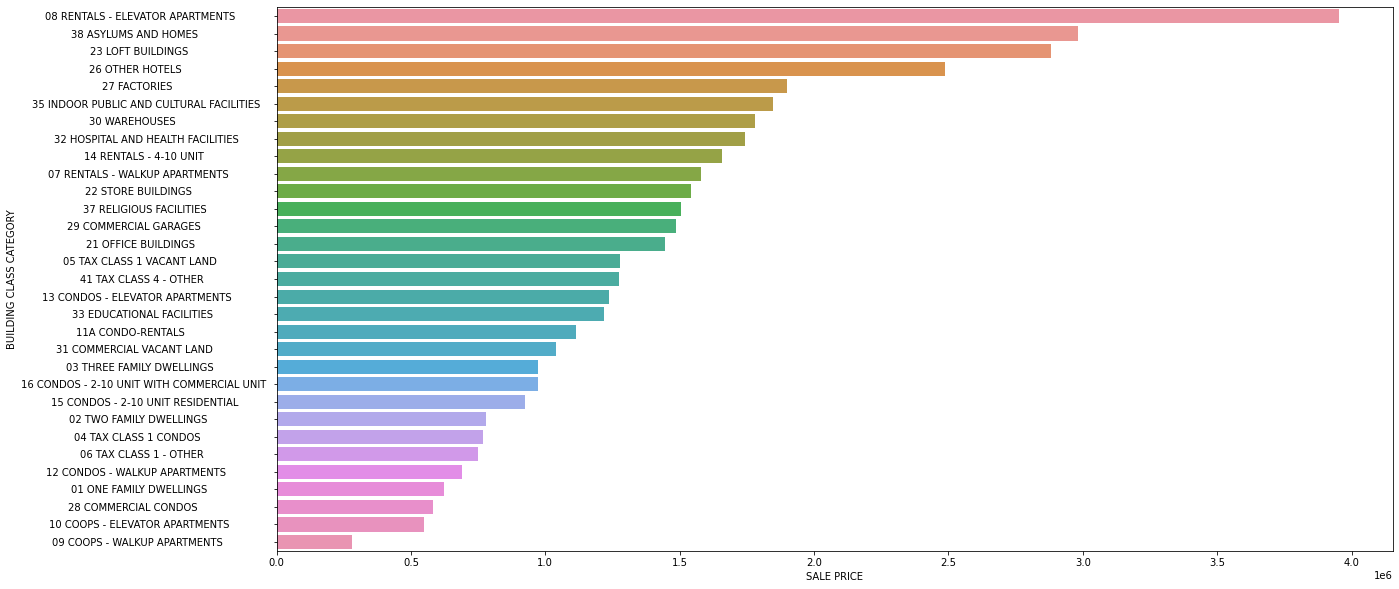

In [38]:
cat=df[["BUILDING CLASS CATEGORY", "SALE PRICE"]].groupby(['BUILDING CLASS CATEGORY'], as_index=False).mean().sort_values(by='SALE PRICE', ascending=False)
plt.figure(figsize=(20,10))

sns.barplot(x='SALE PRICE', y='BUILDING CLASS CATEGORY', data=cat, orient = 'h')

# PRICEY BUILDING CLASS ==> 08 RENTALS-ELEVATOR APARTMENTS

In [39]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['SALE DATE'].dtype
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['YEAR SOLD'] = (df['SALE DATE']).dt.year
df['MONTH SOLD']= (df['SALE DATE']).dt.month
# del(df["SALE DATE"])

Text(0.5, 1.0, 'Sales per Borough from 2016-2017')

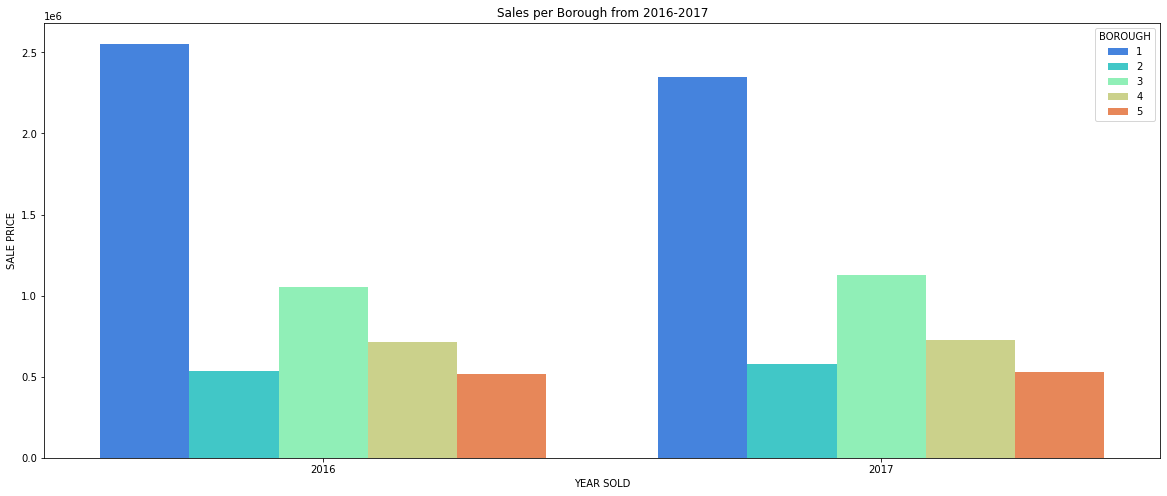

In [40]:
plt.subplots(figsize=(20,8))
sns.barplot(x='YEAR SOLD', y='SALE PRICE', hue='BOROUGH', data=df, palette='rainbow', ci=None)
plt.title('Sales per Borough from 2016-2017')

# MANHATTAN WAS EXPENSIVE IN 2016 & 2017 IN BOROUGH.
**HOWEVER, DIP IN SALES IN 2017. {WHY??}**
# WHEREAS, BRONX & BROOKLYN SHOWED INCREMENT.  

# BOROUGH: Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

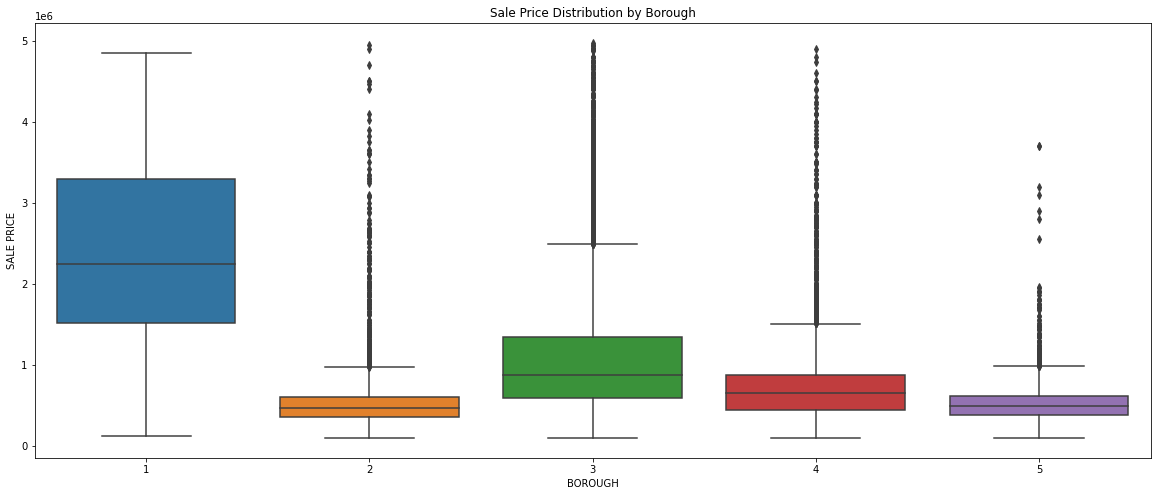

In [41]:
plt.subplots(figsize=(20,8))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
plt.title('Sale Price Distribution by Borough')
plt.show()

Text(0.5, 1.0, 'Sales per Borough')

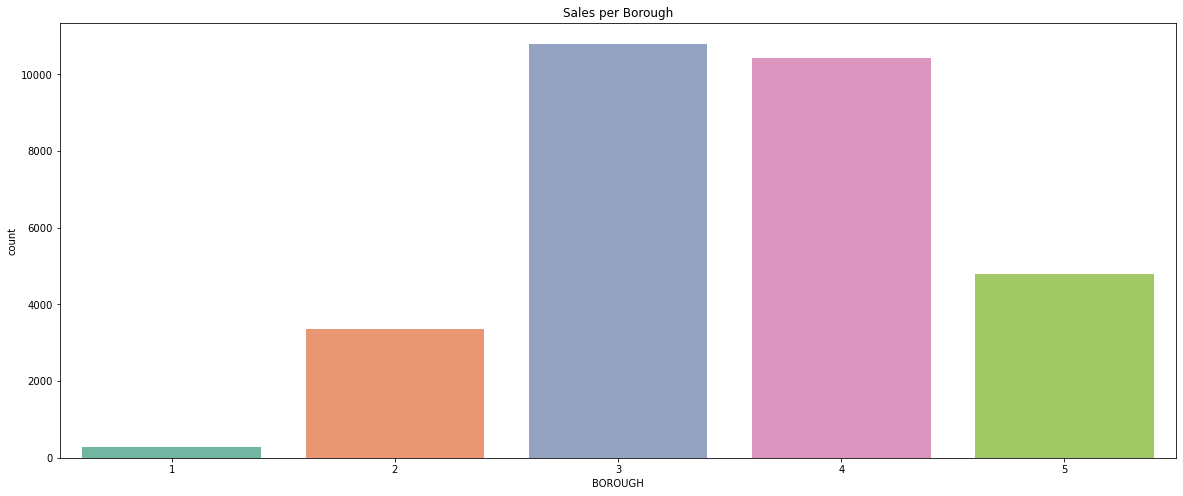

In [42]:
plt.subplots(figsize=(20,8))
sns.countplot('BOROUGH',data=df,palette='Set2')
plt.title('Sales per Borough')

Text(0.5, 1.0, 'Sales per borough_Residential')

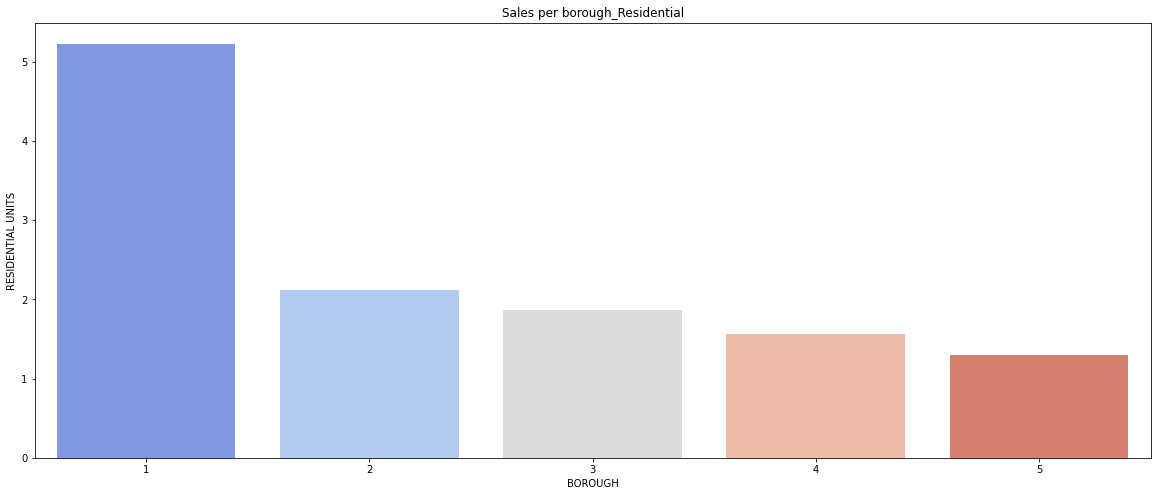

In [43]:
plt.subplots(figsize=(20,8))
sns.barplot(y='RESIDENTIAL UNITS', x='BOROUGH',data=df, palette='coolwarm', ci=None)
plt.title('Sales per borough_Residential')

Text(0.5, 1.0, 'Sales per borough_Commercial')

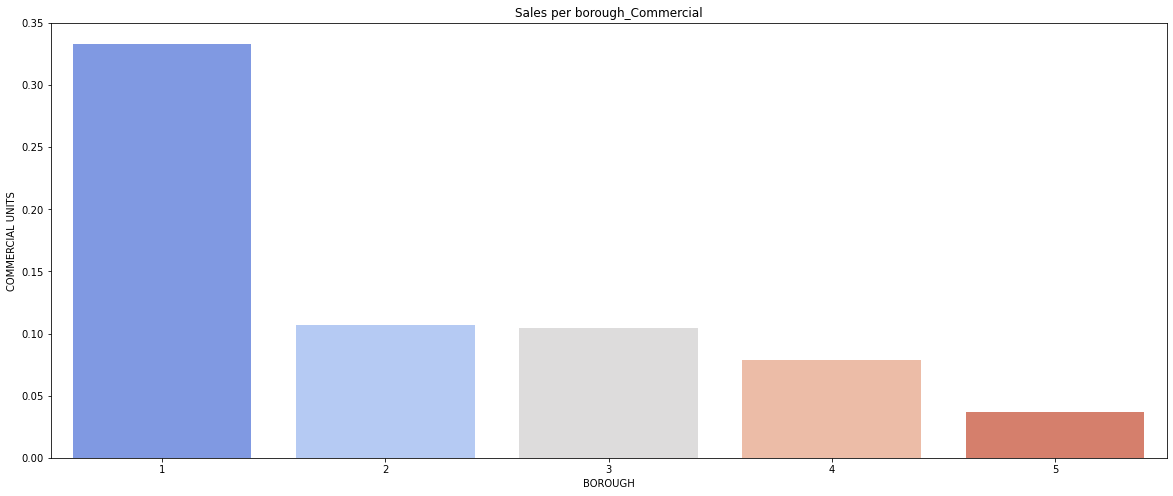

In [44]:
plt.subplots(figsize=(20,8))
sns.barplot(y='COMMERCIAL UNITS', x='BOROUGH',data=df, palette='coolwarm', ci=None)
plt.title('Sales per borough_Commercial')

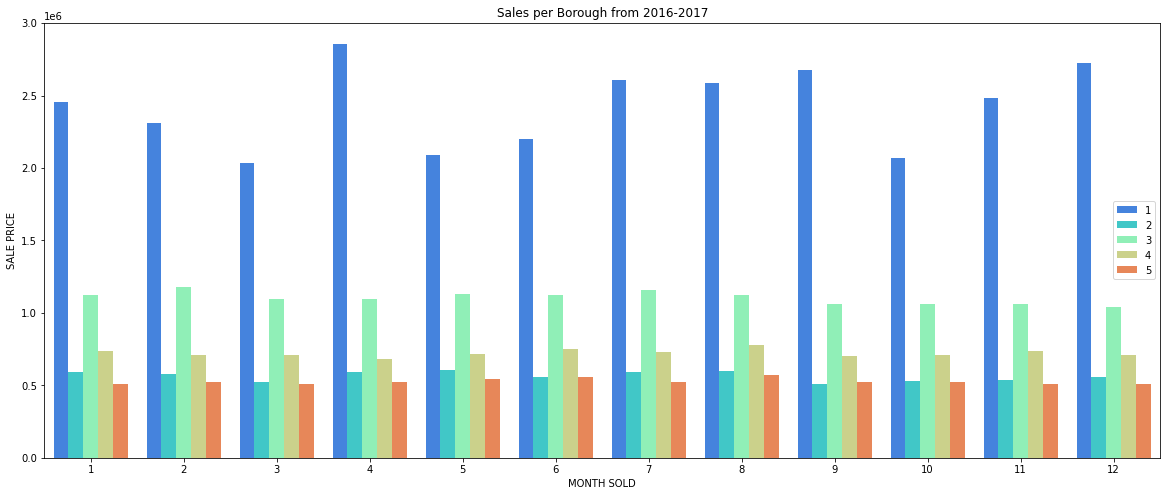

In [45]:
plt.figure(figsize=(20,8))
sns.barplot(x='MONTH SOLD', y='SALE PRICE', hue='BOROUGH', data=df, palette='rainbow', ci=None)
plt.title('Sales per Borough from 2016-2017')
plt.legend(loc='right')

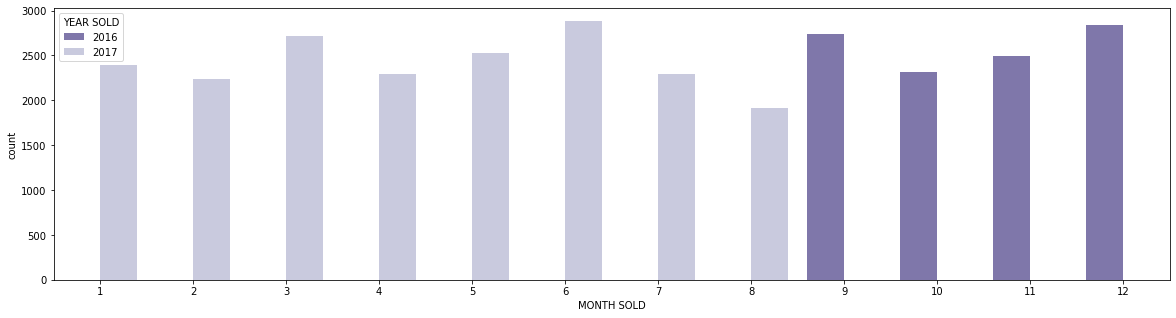

In [46]:
plt.figure(figsize=(20,5))
sns.countplot('MONTH SOLD', hue='YEAR SOLD', data=df, palette='Purples_r')

# PROPERTY SALES{2017} ==> January-August, PROPERTY SALES{2016} ==> September-December.

In [47]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [48]:
from collections import Counter
NEIGHBORHOOD = list(dict(Counter(df.NEIGHBORHOOD).most_common(20)).keys())

avg_sale_prices = []
for i in NEIGHBORHOOD:
    avg_price = np.mean(df.SALE_PRICE[df.NEIGHBORHOOD == i])
    avg_sale_prices.append(avg_price)

Text(0.5, 1.0, 'Average House Price in the top 20 neighborhoods')

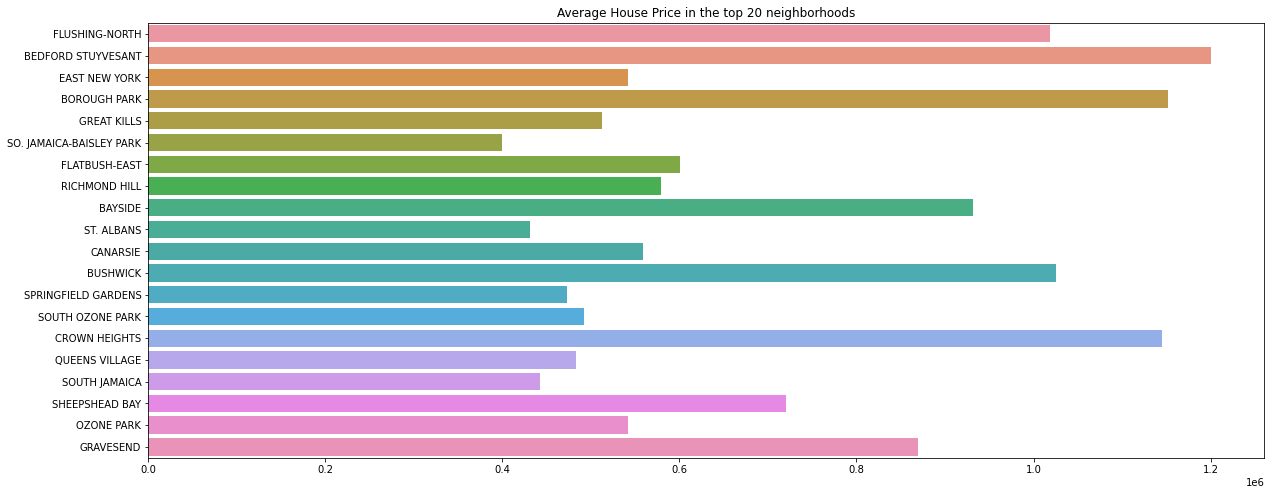

In [49]:
plt.figure(figsize=(20,8))
sns.barplot(x= avg_sale_prices, y= NEIGHBORHOOD , ci=None)
plt.title('Average House Price in the top 20 neighborhoods')

# BEDFORD WAS WAY TOO EXPENSIVE

# THE END

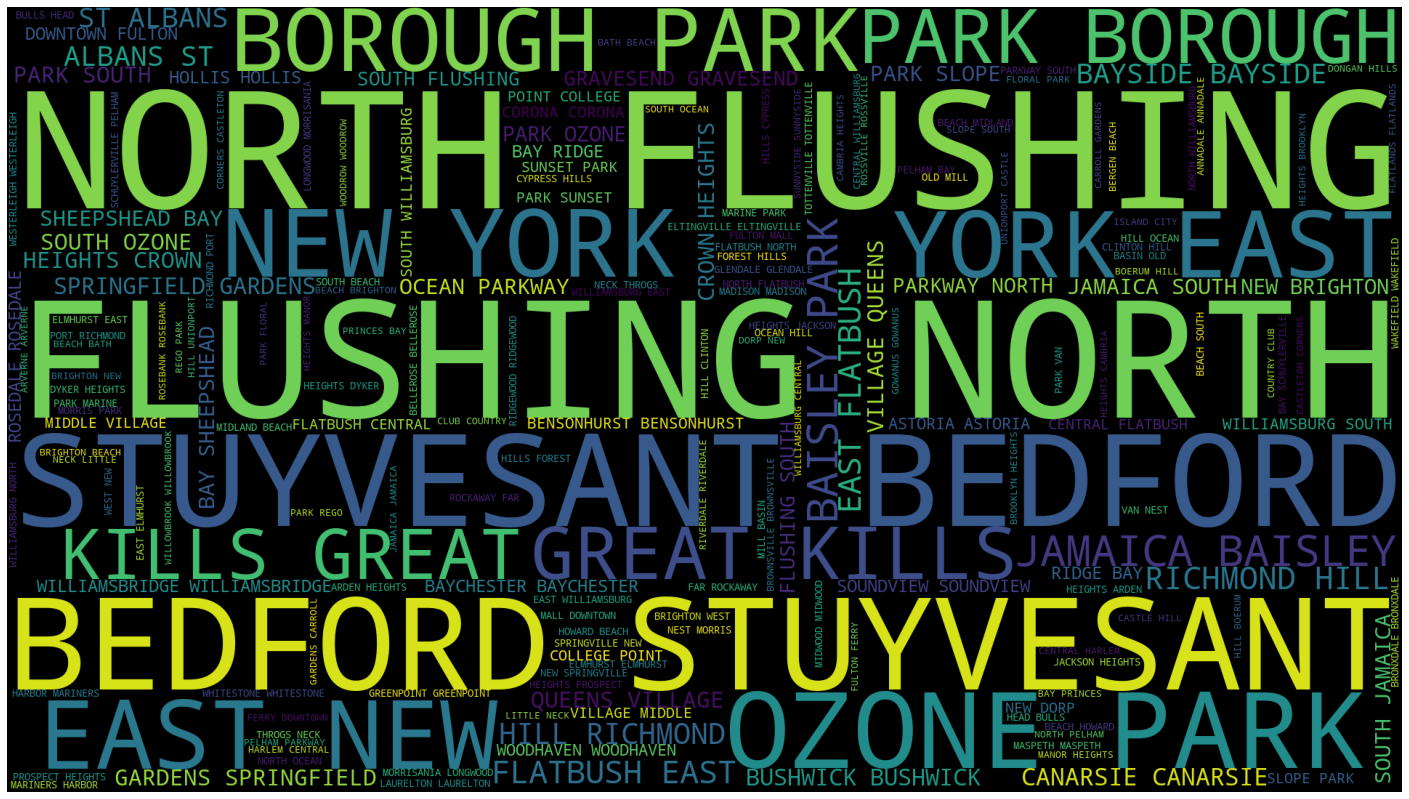

In [50]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.NEIGHBORHOOD))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()